|

# Ejercicio de Regresion Lineal 

En este notebook vamos a describir paso a paso un ejercicio de prediccion, a traves de regresion lineal, de la cantidad de ocasiones en que comparte un articulo del area de machine Learning en un Blog

# Prediccion: Cantdad de ocasones en que se comparte un articulo de un Blog 

Se inicia importando, ajustado y visualizando los datos

In [1]:
# Importamos librerias y ajustes necesarios

import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Se carga el archivo de datos de entradas csv como dataset de Pandas. los datos proviene del sitio web https://www.kdnuggets.com 
data = pd.read_csv("./articulos de blog ml.csv")

Pandas es una libreria de Python destinada a analisis de datos, qie proporciona estructura de datos flexibles las cuales permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguiente estructura sde daros: Series; Son arrays con indexacion (arrays con indice o etiqutados), similar a los diccionarios. Puede generarse a partir de diccionariso de la listas. Dataframe: Son estructuras de datos similares a las tables de base de datos relaciones con SQL, Panel, Panel4D y PanelND; Son estructuras de datos  que permite trabajar con mas de dos dimensiones

In [3]:
#Revisamos la dimension (registros x columnas)que contiene el archivo
data.shape

(161, 8)

(161, 8)

In [4]:
# Podemos revisar los primeros registrados para comprobar el funcionamiento
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos atributos (columnas) tienen valores nulos NaN; por ejemplo, en el atrinuto "url". En este caso el atributo Share ser la salida; es decir, el valor "Y" del modelo regresion lineal, el valor que se desea predecir

In [5]:
# Se realiza estadistica descriptiva para tener un conociminento inicial de los datos:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa, por ejemplo, la media del atributo Word count (cantidad de palabras) es de 188.26. Tambien se observa que el articulo mas pequeño contiene 250 palabras y el mas grande 8401 palabras. Con respecto a cuanto se ha compartido un articulo (#Share), existen los que nunca se han compartido (o veces) y los mas recurrentes con 350,000 ocasiones (muy popular!)

## VIsualizacion General

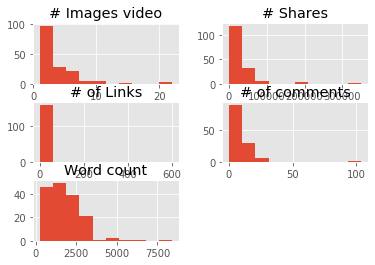

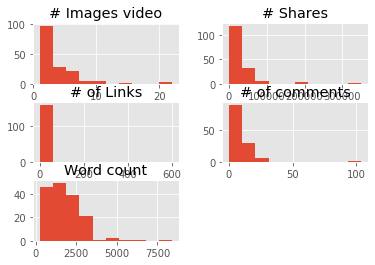

In [6]:
# Se visualizan los atributos de entradas histograma y barras (cuantitativa y cualitativas)
data.drop(["Title","url","Elapsed days"],1).hist()
plt.show()

Las graficas comunicasn entre que valores se encuentran la mayoria de los registros. Seguidamente se filtran los datos por cantidad de palabras dejandonos los registros con menos de 3500 palabras y tambien #Shares con menos 80.00.

## Se puede visualizar por ejemplo Cantidad de palabras vs Compartidas

In [8]:
#Visualizar datos de entrada
colores = ['orange','blue']
tamanios = [30,60]

f1= data['Word count'].value
f2= data['# Shares'].value

#Pintar en 2 colores los puntos por debajo de la media de cantidad de palabras 
asignar =[]

for index,row in data.iterrows():
    if (row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()

AttributeError: 'Series' object has no attribute 'value'

AttributeError: 'Series' object has no attribute 'value'

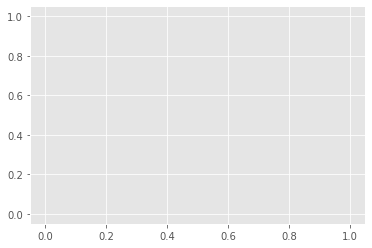

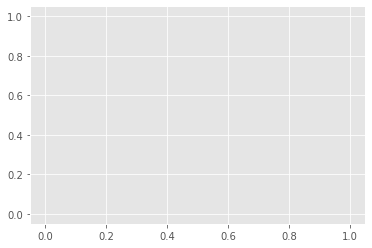

In [9]:
#Visualizar los datos en la zona donde se concentramos los pntos 
#esto es en el ejex: entre 0 y 3500
#en el Y: entre 0 y 80.00
filtered_data = data[data['Word count']<= 3500 & (data['# Shares']<= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en coolores los puntos por debajo y por encima de la media de cantidad de palabras
asignar = []
for index,row in filtered_data.iterrows():
    if (row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [10]:
#Se revisan los cambios de volres una vez filtrado 
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


### Regresion Lineal simple (1 atributo con Python y SKLearn)

In [11]:
# Se asigna el atributo de entrada X para entrenamiento y las etiquetas Y
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
Y_train = filtered_data['# Shares'].value

AttributeError: 'Series' object has no attribute 'value'

AttributeError: 'Series' object has no attribute 'value'

In [ ]:
# Se genera el objeto de regresion lineal
regr= linear_model.LinearRegression()

# Se entre el modelo
regr.fit(X_train, Y_train)

# Se reaiza las predicciones
y_pred = regr.predict(X_train)

# Se revisa los coeficientes obtenidos, en este caso sera la tangente
print('Coeficientes: \n', regr.coef_)
#Este es el valor donde corta el eje Y (en x=0)
print('Termino indepentdiente: \n',regr.intercept_)
#Error de cuadrado medio
print('Media del error cuadrado%.2f' % mean)